# Data Analysis Project 6: Graphing Video Game Sales
You’re reviewing sales for the top 100 video games from the years 2000-2015 to gather insights. Use Python’s Pandas, Matplotlib, and Seaborn libraries to interact with the data and create graphs.

Import:
- Pandas
- Matplotlib
- Seaborn
- CSV data
- Set Seaborn theme

In [992]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
games = pd.read_csv('top100videogamesales.csv')
sns.set_theme()

## Question 1

Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

### Strategy
- Group the publishers and sum the sales for each region.

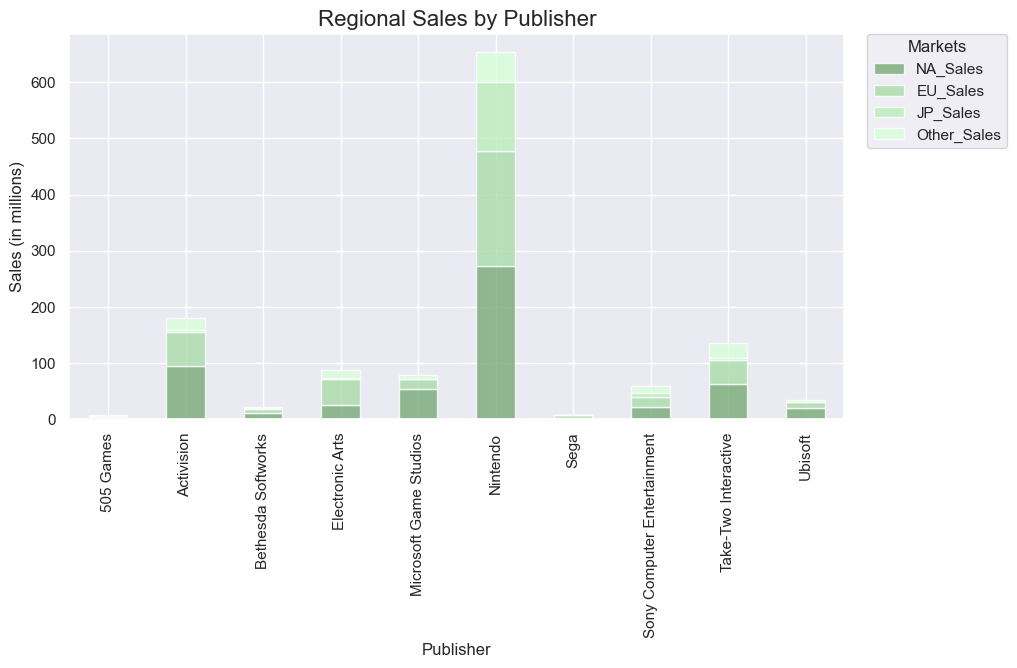

In [993]:
# Calculation
sales_by_publisher = games.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plot
colors = ['#77AA77', '#AADDAA', '#BBEEBB', '#D9FFD9', '#F2FFF2']
sales_by_publisher.plot(kind='bar', stacked=True, color=colors, figsize=(10, 5), alpha=0.8, edgecolor='#ffffff') 
plt.title('Regional Sales by Publisher', fontsize=16)
plt.legend(title='Markets', bbox_to_anchor=(1.02, 1.02), loc='upper left')
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.show()

### Analysis
Nintendo holds a dominant position in the North American, European, and Japanese markets, with a comparatively weaker lead in the other markets. Activision follows as a distant second in both the North American and European markets. In other markets, both Activision and Take-Two Interactive are much more closely positioned as runners-up.

## Question 2
Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

### Strategy
- Group the years and sum the sales of each year.

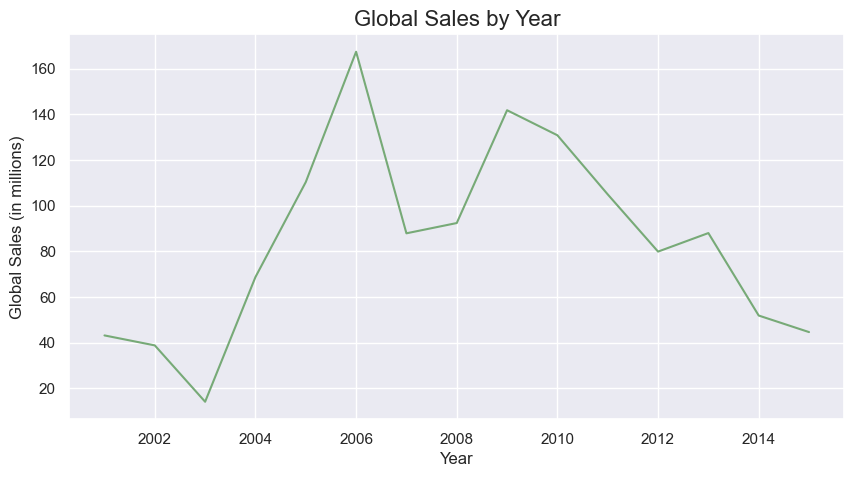

In [994]:
# Calculation
sales_by_year = games.groupby('Year')['Global_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], color='#77AA77')
plt.title('Global Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.show()

### Analysis
Global game sales experienced significant fluctuations, characterized by distinct peaks and troughs. Sales hit an all-time low in 2003, but rebounded to reach a peak in 2006. Following this, there was a dip in 2007, only for sales to surge again to a secondary peak in 2009. However, after 2009, sales began a steady decline, with levels in 2014 below those in 2004.

## Question 3
Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

### Strategy
- Filter the genres column for action games

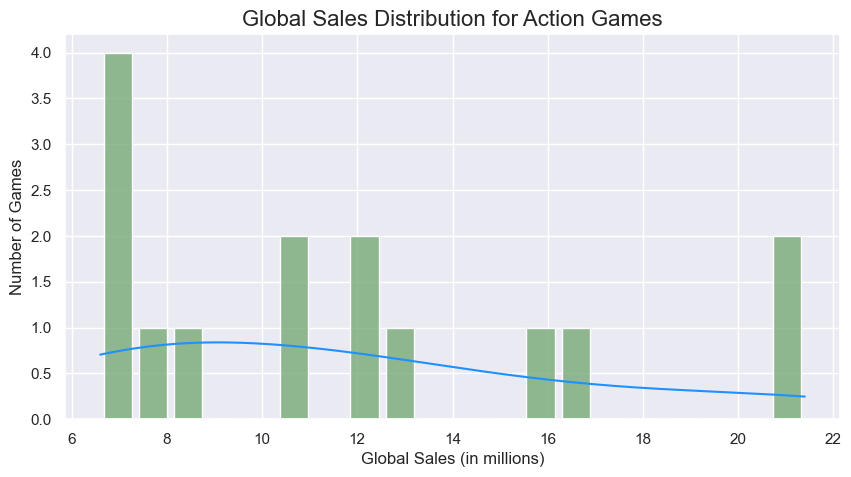

In [995]:
# Calculation
action_games = games[games['Genre'] == 'Action']

# Plot
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=action_games, x='Global_Sales', bins=20, shrink=0.8, kde=True, color='#77AA77', alpha=0.8, edgecolor='#ffffff')
ax.lines[0].set_color('#1E90FF')
plt.title('Global Sales Distribution for Action Games', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.show()

### Analysis
There are a total of 15 Action games. Of these, four games achieved sales of approximately 7 million units each, demonstrating a modest level of success. In contrast, two games stood out as top performers, each selling around 21 million units. Among the remaining nine games, two sold close to 8 million units, while another two reached sales figures of about 16 million units. Additionally, one game sold approximately 13 million units. There are also two pairs of games with similar sales performance, one pair selling just under 11 million units each, and another pair selling around 12 million units.

## Question 4
North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.


### Strategy
- Group the genres, sum the North American sales and sort in descending order
- Calculate the sum for total game sales
- Set the Other category threshold at 5% of total game sales
- Create a filtered list of what genres should be in the Other category
- Sum the sales of games bellow the threshold and aggregate into a single value
- Filter for genres with sales equal to or above the threshold
- Add the Other category to the list of genres

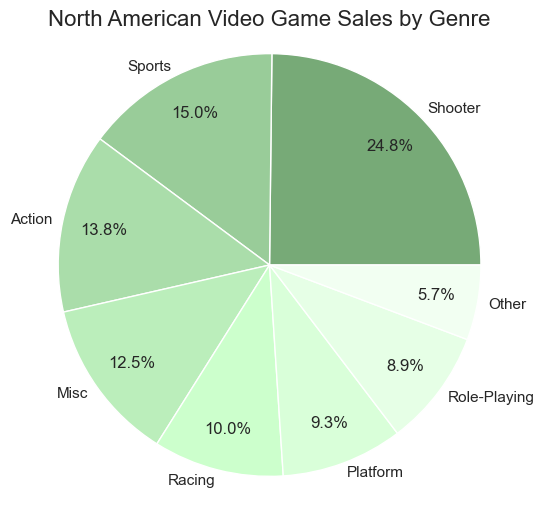

In [996]:
# Calculation
sales_by_genre = games.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
total_sales = sales_by_genre.sum()
threshold = 0.05 * total_sales
genres_below_threshold = sales_by_genre[sales_by_genre < threshold].index.tolist()
other_sales = sales_by_genre[sales_by_genre < threshold].sum()
sales_by_genre = sales_by_genre[sales_by_genre >= threshold]
sales_by_genre['Other'] = other_sales

# Plot
colors = ['#77AA77', '#99CC99', '#AADDAA', '#BBEEBB', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#FCFFFC']
plt.figure(figsize=(6, 6))
plt.pie(sales_by_genre, labels=sales_by_genre.index, autopct='%1.1f%%', colors= colors, pctdistance=0.8, labeldistance=1.05)
plt.title('North American Video Game Sales by Genre', fontsize=16)
plt.axis('equal')
plt.show()

### Anaylsis
The leading genre in North American video game sales is Shooters. Sports follows with a 9.8% lower market share. Interestingly, the Misc genre, which lacks a clear definition, holds a 12.5% share, significantly outpacing the Other category. The Other category includes genres like Simulation, Fighting, and Puzzle.

## Question 5
European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

### Strategy
- Group the genres, sum the European sales and sort in descending order
- Calculate the sum for total game sales
- Set the Other category threshold at 5% of total game sales
- Create a filtered list of what genres should be in the Other category
- Sum the sales of games bellow the threshold and aggregate into a single value
- Filter for genres with sales equal to or above the threshold
- Add the Other category to the list of genres

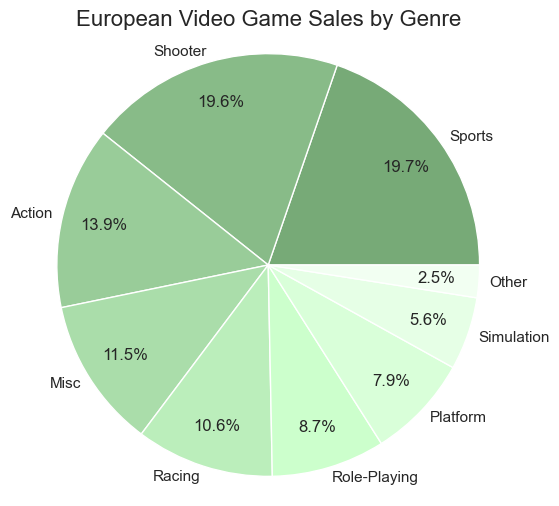

In [997]:
# Calculation
sales_by_genre = games.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
total_sales = sales_by_genre.sum()
threshold = 0.05 * total_sales
genres_below_threshold = sales_by_genre[sales_by_genre < threshold].index.tolist()
other_sales = sales_by_genre[sales_by_genre < threshold].sum()
sales_by_genre = sales_by_genre[sales_by_genre >= threshold]
sales_by_genre['Other'] = other_sales

# Plot
colors = ['#77AA77', '#88BB88', '#99CC99', '#AADDAA', '#BBEEBB', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#FCFFFC']
plt.figure(figsize=(6, 6))
plt.pie(sales_by_genre, labels=sales_by_genre.index, autopct='%1.1f%%', colors= colors, pctdistance=0.8, labeldistance=1.05)
plt.title('European Video Game Sales by Genre', fontsize=16)
plt.axis('equal')
plt.show()

### Anaylsis
The leading genre in video game sales in Europe is Sports. Shooters follow closely, with only a 0.1% difference in market share. Notably, the proximity of the second-place genre to the first highlights the lack of a clear market leader. Additionally, the 'Other' category, includes genres like Puzzle and Fighting.

## Question 6
Explain differences and similarities between the North American and European charts in markdown.

### Analysis
In comparing the video game sales charts between North America and Europe, several differences and similarities emerge. The North American market shows a significant 9.8% gap between the first and second place genres, whereas the European market has a much narrower gap of only 0.1%. The 'Other' category in Europe is 3.2% smaller than its counterpart in North America. Both regions share five genres that account for over 10% of sales each. Additionally, both markets include "Puzzle" and "Fighting" within their 'Other' categories. Notably, 'Simulation' is absent from the European 'Other' category but present in North America's. The role-playing and platform genres are unique in that they have swapped positions when comparing the two markets. Lastly, the 'Misc' genre, which is unclear, falls within 1% of market share in both regions.

## Question 7
Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

### Strategy
- Create a series containing the counts of each instance of a Platform

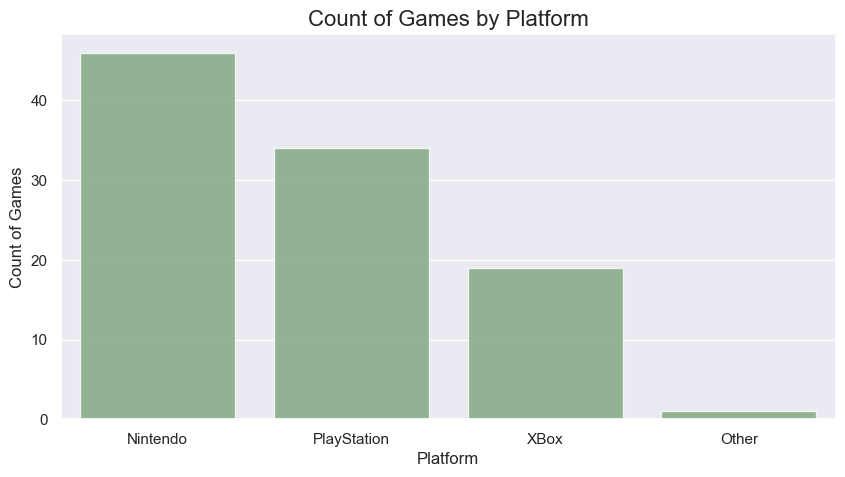

In [998]:
# Calculation
platform_count = games['Platform'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=platform_count.index, y=platform_count.values, color='#77AA77', alpha=0.8, edgecolor='#ffffff')
plt.title('Count of Games by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count of Games', fontsize=12)
plt.show()


### Analysis
Nintendo leads the market with a share in the mid-40s, followed by PlayStation in the low 30s, and Xbox in the high 20s. There is also a minimal 'Other' category present. The analysis becomes complex as Microsoft argues that Windows should be considered a gaming platform. Therefore, for a comprehensive assessment, all PCs meeting certain specifications would need to be included in the count before determining the true market leader.

## Extra Credit Question 1
What genre of game is present the most in the top 100 games from 2000-2015?

### Strategy
- Sort the top 100 games by global sales in descending order
- Group the 100 games by genre, count how many are in each genre, sort in descending order
- Calculate how many games are in all genres (incase the 100 number changes in the future)
- Set the Other category threshold at 5% of total games
- Create a filtered list of what genres should be in the Other category
- Sum the count of genres bellow the threshold and aggregate into a single value
- Filter for genres with enough games equal or above the threshold
- Add the Other category to the list of genres

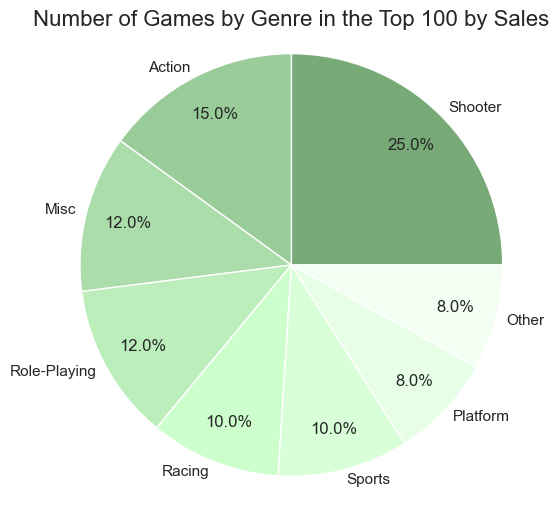

Genres included in 'Other' are: Simulation, Fighting, Puzzle


In [999]:
# Calculation
top_100_games = games.sort_values('Global_Sales', ascending=False).head(100)
games_by_genre = top_100_games.groupby('Genre')['Name'].count().sort_values(ascending=False)
total_games = games_by_genre.sum()
threshold = 0.05 * total_games
genres_below_threshold = games_by_genre[games_by_genre < threshold].index.tolist()
other_games = games_by_genre[genres_below_threshold].sum()
games_by_genre = games_by_genre[games_by_genre >= threshold]
games_by_genre['Other'] = other_games

# Plot
colors = ['#77AA77', '#99CC99', '#AADDAA', '#BBEEBB', '#CCFFCC', '#D9FFD9', '#E6FFE6', '#F2FFF2', '#FCFFFC']
plt.figure(figsize=(6, 6))
plt.pie(games_by_genre, labels=games_by_genre.index, autopct='%1.1f%%', colors=colors, pctdistance=0.8, labeldistance=1.05)
plt.title('Number of Games by Genre in the Top 100 by Sales', fontsize=16)
plt.axis('equal')
plt.show()
print(f"Genres included in 'Other' are: {', '.join(genres_below_threshold)}")

### Analysis
Shooter games are the most present in the top 100 games from 2000-2015 as there are 25 shooter games taking up 25% of top 100. If the question asked for the exact amount (and it wasn't top 100) I would instead use a Bar Chart.


Shooter games are the most prevalent in the top 100 games from 2000 to 2015, with 25 titles representing 25% of the list. If the analysis required precise quantities beyond the top 100, a Bar Chart would be the preferred visualization method. Additionally, the 'Other' category includes genres such as Simulation, Fighting, and Puzzle.

## Extra Credit Question 2
What percentage of global sales does PlayStation have in the dataset?

### Strategy
- Group by platform and sum the global sales

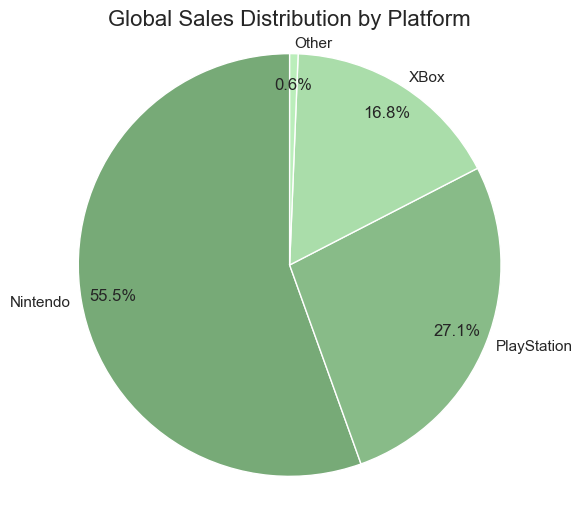

In [1000]:
# Calculation
sales_by_platform = games.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Chart
colors = ['#77AA77', '#88BB88', '#AADDAA', '#BBEEBB', '#D9FFD9', '#E6FFE6', '#FCFFFC']
plt.figure(figsize=(6, 6))
plt.pie(sales_by_platform, labels=sales_by_platform.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85, labeldistance=1.05)
plt.title('Global Sales Distribution by Platform', fontsize=16)
plt.axis('equal')
plt.show()

### Analysis
Playstation has 27.1% of the global sales. I chose a Pie Chart are they are great for visualizing percentages of a whole

## Extra Credit Question 3
What is the distribution of sales for Shooter games?

### Strategy
- Filter the 'Genre for 'Shooter'

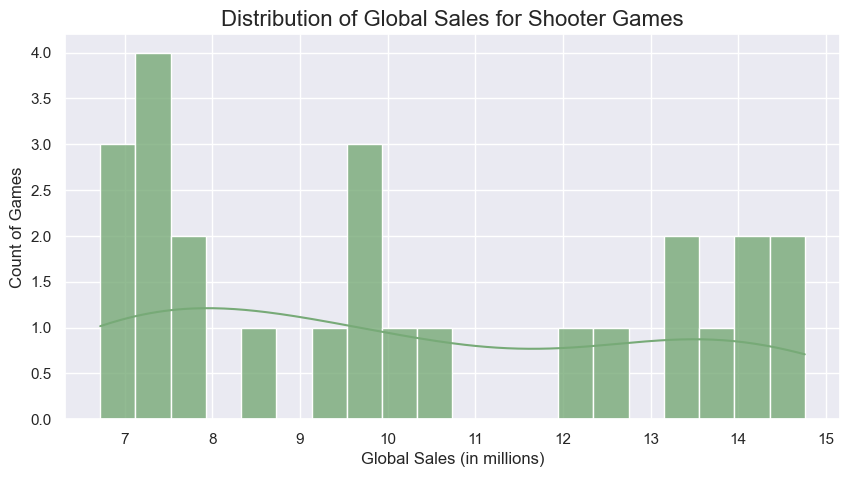

In [1001]:
# Calculation
shooter_games = games[games['Genre'] == 'Shooter']

# Chart
plt.figure(figsize=(10, 5))
sns.histplot(data=shooter_games, x='Global_Sales', bins=20, kde=True, color='#77AA77', alpha=0.8)
plt.title('Distribution of Global Sales for Shooter Games', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Count of Games', fontsize=12)
plt.show()

### Analysis
There are 25 total shoorter games in the graph. There is a cluster of 9 of them between 6.5 million sales and 8 million. There is a second cluster of 6 between 9 million and 10.5 million. There is a third cluster of 7 between 13 million and 14.5 million. There are 2 between 12 million and 13 million and 1 at 8.5 million.